# DEV 1 Project- AMAZON PRIME MOVIES ANALYSIS


# Project Objective:

In [ ]:
# 
The objective of this project is to perform a comprehensive analysis of the Amazon Prime Movies
platform to derive meaningful insights into user preferences, content trends, and the overall performance of the streaming
service. Through data-driven analysis, my aim is to provide recommendations to enhance user experience, optimize content 
acquisition, improve the platform's competitiveness in the streaming market. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt

In [6]:
data = pd.read_csv('amazon_prime_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


# General Discription of DATA.

In [7]:
# Shape data

data.shape

(9668, 12)

In [8]:
# Show columns 

data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Showw data type 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [23]:
# Check 10 first rows

data.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...


#  Cleaning of Data

In [10]:
# Check duplicates data

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9663    False
9664    False
9665    False
9666    False
9667    False
Length: 9668, dtype: bool

In [11]:
# Remove null values in columns rating from dataset 

data = data.dropna(subset=['rating'])

In [26]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2075
cast            1208
country         8674
date_added      9191
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

# DATA ANALYSIS

#  1- We want to know how many director as a unique and how many times it occurs.

In [12]:

data['director'].unique()

array(['Girish Joshi', 'Glenn Miller', nan, ...,
       'John-Paul Davidson, Stephen Warbeck', 'Emily Skye',
       'Steve Barker'], dtype=object)

In [13]:
data['director'].value_counts()

Mark Knight              105
Cannis Holder             61
Moonbug Entertainment     37
Arthur van Merwijk        30
Jay Chapman               23
                        ... 
Michael Nickles            1
Jeff Pearson               1
Keyaar                     1
Fred Zinnemann             1
Steve Barker               1
Name: director, Length: 5555, dtype: int64

# 2- Generate descriptive statistics of release year

In [14]:
# 2- Describe numeric values 

data.describe()

,release_year
count,9331.000000
mean,2008.194299
std,19.143763
min,1920.000000
25%,2006.000000
50%,2016.000000
75%,2020.000000
max,2021.000000


# 3- How many null value present, show all the null values in the heatmap.

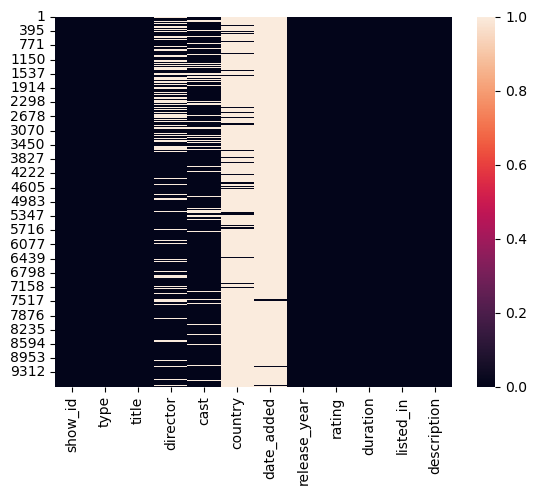

In [15]:
sns.heatmap(data.isnull())
plt.show()

# 4- In which year highest number of TV shows and Movies were release.

In [16]:
data['release_year'].value_counts()

2021    1425
2020     923
2019     899
2018     592
2017     531
        ... 
1926       2
1922       2
1923       1
1924       1
1927       1
Name: release_year, Length: 100, dtype: int64

# 5- How many movies and TV shows in the dataset, show along with graph?

In [17]:
data['type'].value_counts()

Movie      7483
TV Show    1848
Name: type, dtype: int64

In [18]:
data.shape

(9331, 12)

# 6- Represent with bar graph.

<Axes: >

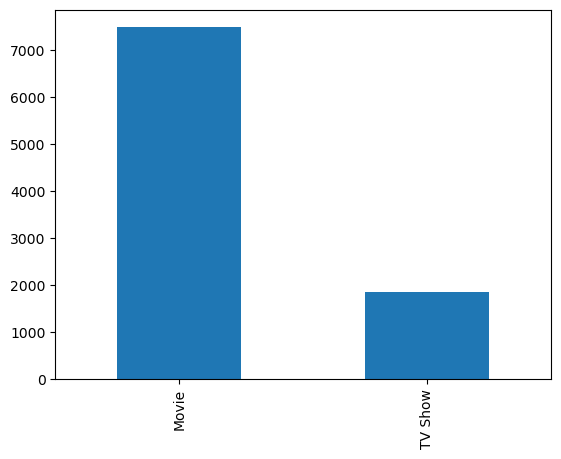

In [19]:
data['type'].value_counts().plot(kind='bar')

# 7- Top 3 Director who gave the highest number of movie and TV shows released on prime.

In [20]:
data['director'].value_counts().head(3)

Mark Knight              105
Cannis Holder             61
Moonbug Entertainment     37
Name: director, dtype: int64

# 8- Represent with Graph.

<Axes: >

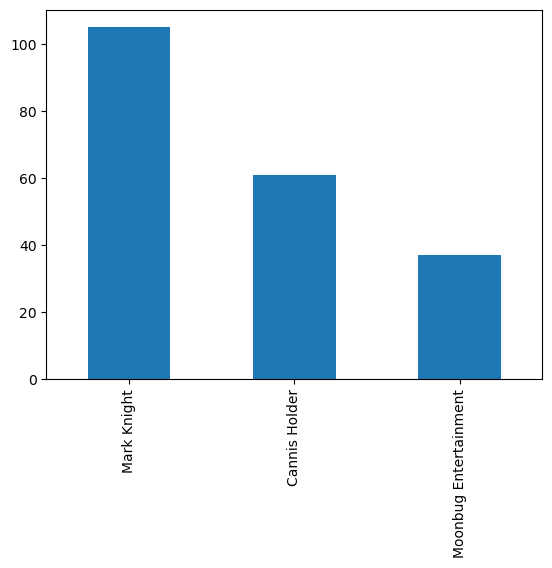

In [21]:
data['director'].value_counts().head(3).plot(kind='bar')

# 8- Show all record type in movie where director is Mark Knight.

In [22]:
data[(data['type']== 'movie')&(data['director']== 'Mark Knight')].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# 9- In which year the rating is highest, show in a plot.

<Axes: xlabel='release_year', ylabel='rating'>

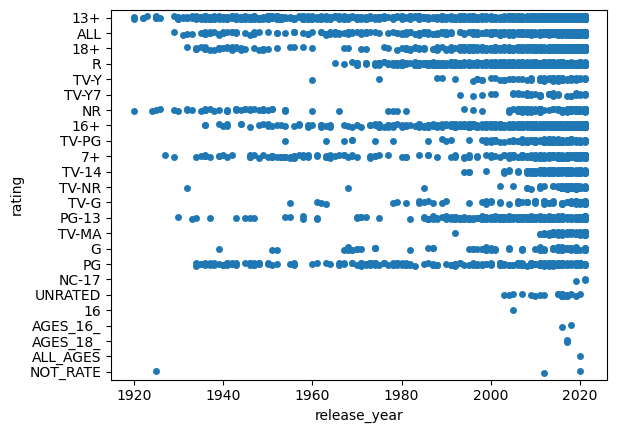

In [23]:
sns.stripplot(x='release_year' , y='rating', data=data)

# 10- To find Number of Adult rated movies to analyze wether Amazon prime is safe for kids or not.

In [25]:
# Assuming 'rating' is the column containing movie ratings
# Count the number of movies with a rating above "18+"
num_adult_movies = len(data[data['rating'] > '18+'])

# Print the result
print(f"Number of movies with a rating above '18+': {num_adult_movies}")


Number of movies with a rating above '18+': 4423


In [27]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv("amazon_prime_titles.csv")

# Extract numeric durations from the "duration" column
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Find the maximum and minimum movie durations
max_duration = df['duration'].max()
min_duration = df['duration'].min()

print(f"Maximum Movie Duration: {max_duration} minutes")
print(f"Minimum Movie Duration: {min_duration} minutes")



Maximum Movie Duration: 601.0 minutes
Minimum Movie Duration: 0.0 minutes


# 11- Frequency Distribution Graph on Duration

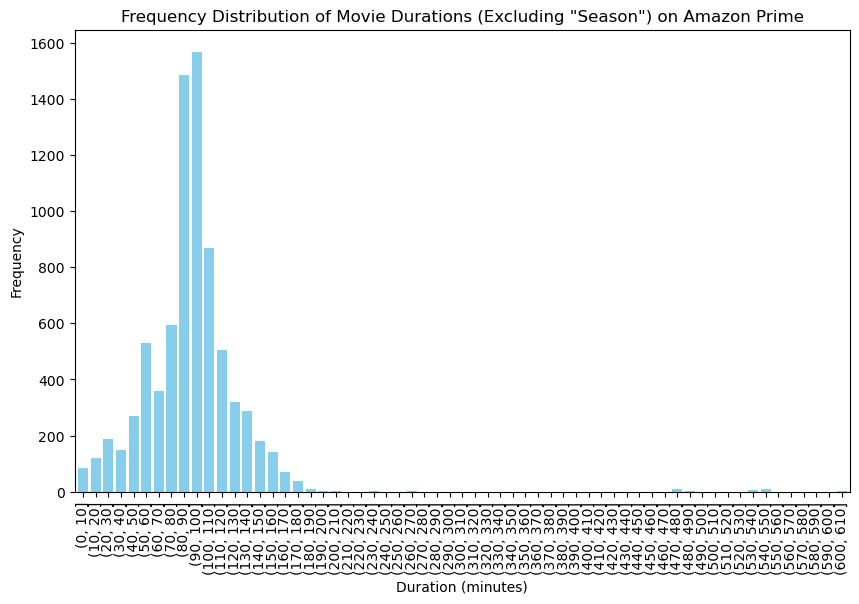

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('amazon_prime_titles.csv')

# Filter out rows with 'duration' containing the word 'season'
data = data[~data['duration'].str.contains('season', case=False)]

# Select the 'duration' column
duration_data = data['duration']

# Convert the duration values to integers (remove ' min' and convert to int)
duration_data = duration_data.str.replace(' min', '').astype(int)

# Set the bin range for the frequency distribution
bins = range(0, max(duration_data) + 10, 10)

# Create the frequency distribution using Pandas
frequency_dist = duration_data.groupby(pd.cut(duration_data, bins)).count()

# Create a bar chart to visualize the frequency distribution
plt.figure(figsize=(10, 6))
frequency_dist.plot(kind='bar', width=0.8, color='skyblue')

# Add labels and title
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Movie Durations (Excluding "Season") on Amazon Prime')

# Show the plot
plt.show()



# 12 Frequency Distribution graph on different Genre

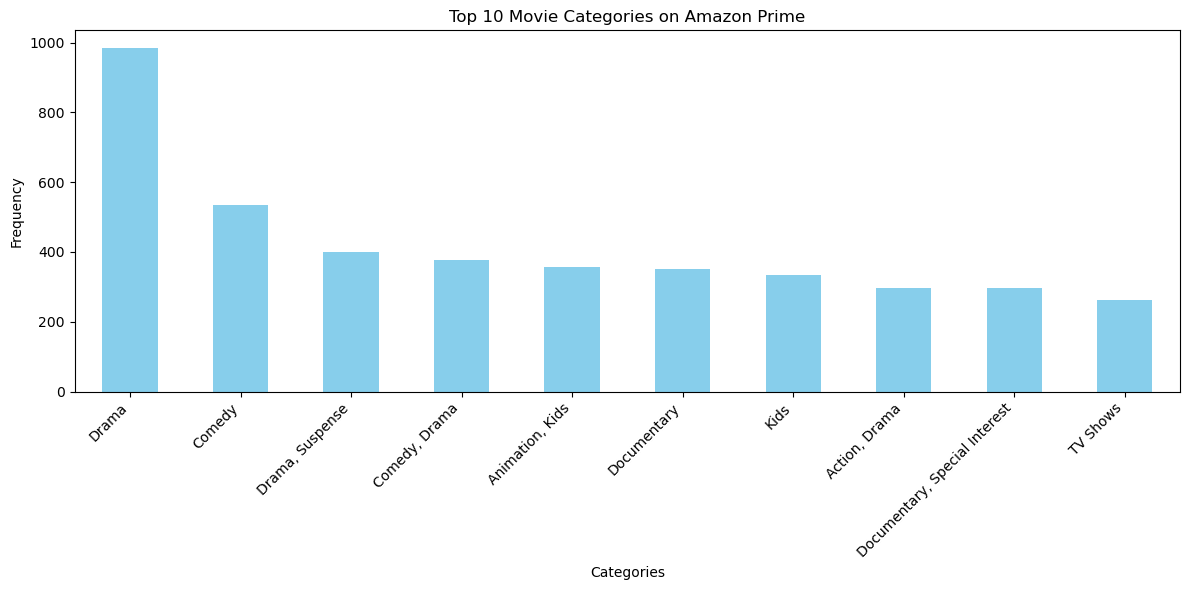

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('amazon_prime_titles.csv')

# Count the frequency of each unique value in the 'listed_in' column
listed_in_counts = data['listed_in'].value_counts()

# Select the top N categories by frequency (you can change N to your desired number)
N = 10
top_listed_in_counts = listed_in_counts.head(N)

# Plot the frequency graph
plt.figure(figsize=(12, 6))
top_listed_in_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title(f'Top {N} Movie Categories on Amazon Prime')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# 13- Descriptive Statistic of Duration of movies.

In [33]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('amazon_prime_titles.csv')

# Remove rows with 'season' in the 'duration' column
data = data[~data['duration'].str.contains('season', case=False, na=False)]

# Convert the 'duration' column to a numeric format (removing ' min' from the values)
data['duration'] = data['duration'].str.replace(' min', '').astype(float)

# Calculate descriptive statistics
duration_stats = data['duration'].describe()

# Print the descriptive statistics
print(duration_stats)


count    7814.000000
mean       91.311876
std        40.333086
min         0.000000
25%        75.000000
50%        91.000000
75%       106.000000
max       601.000000
Name: duration, dtype: float64


# 14- Pie chart on rating. 

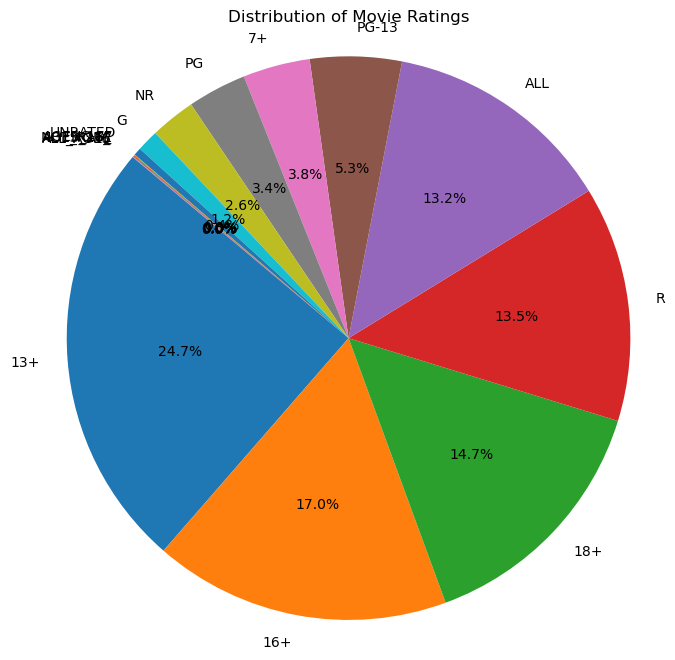

In [34]:

import matplotlib.pyplot as plt

# Group the data by ratings and count the number of movies in each rating category
rating_counts = data['rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movie Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


In [35]:
import pandas as pd

# Group the data by ratings and count the number of movies in each rating category
rating_counts = data['rating'].value_counts()

# Create a DataFrame from the rating counts
rating_table = pd.DataFrame({'Rating': rating_counts.index, 'Count': rating_counts.values})

# Display the tabular data
print(rating_table)


      Rating  Count
0        13+   1849
1        16+   1272
2        18+   1097
3          R   1010
4        ALL    988
5      PG-13    393
6         7+    288
7         PG    253
8         NR    194
9          G     93
10   UNRATED     33
11     NC-17      3
12  AGES_18_      3
13  NOT_RATE      3
14  AGES_16_      2
15        16      1
16  ALL_AGES      1


# Trend Analysis on movie released wrt year. 

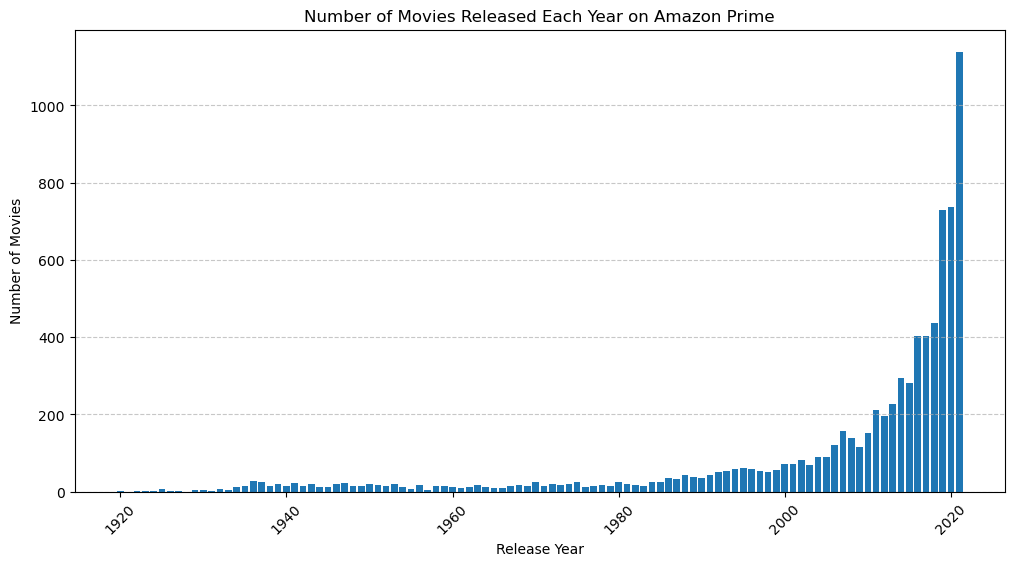

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('amazon_prime_titles.csv')  # Replace with your dataset file path

# Extract the year from the 'release_year' column and count the occurrences
movie_counts_by_year = data[data['type'] == 'Movie']['release_year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(movie_counts_by_year.index, movie_counts_by_year.values)
plt.title('Number of Movies Released Each Year on Amazon Prime')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()
